In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import mean_squared_error,accuracy_score,r2_score,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
iris=datasets.load_iris()
print(iris.data.shape)

(150, 4)


In [3]:
print(iris.target.shape)

(150,)


In [4]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
print('Target:1:{},2:{},3:{}'.format(np.sum(iris.target==0),np.sum(iris.target==1),np.sum(iris.target==2)))

Target:1:50,2:50,3:50


In [7]:
df=pd.DataFrame(iris.data)
print(df.head())

     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


In [8]:
df.columns=iris.feature_names
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [9]:
df['flower_type']=iris.target
print(df.head(3))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   flower_type  
0            0  
1            0  
2            0  


In [10]:
X_train,X_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.25,random_state=42)

In [11]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.fit_transform(X_test)

In [12]:
print(X_train_std.shape)

(112, 4)


In [13]:
print(X_test_std.shape)

(38, 4)


In [14]:
print(y_train.shape)

(112,)


In [15]:
print(y_test.shape)

(38,)


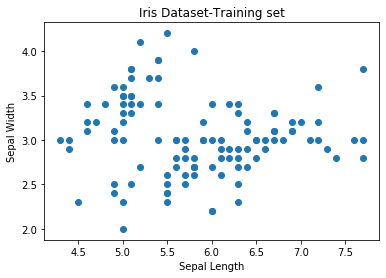

In [16]:
plt.scatter(X_train[:,:1],X_train[:,1:2])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset-Training set')
plt.show()

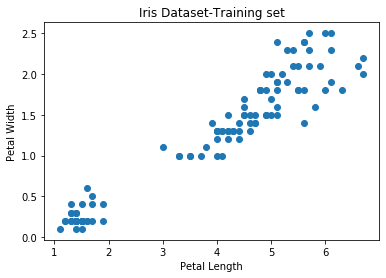

In [17]:
plt.scatter(X_train[:,2:3],X_train[:,3:])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Dataset-Training set')
plt.show()


In [18]:
logreg=LogisticRegression(max_iter=500)

In [19]:
logreg.fit(X_train_std,y_train)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred=logreg.predict(X_test_std)


In [21]:
print(y_pred.shape)

(38,)


In [22]:
print(y_test)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]


In [23]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 2
 0]


In [24]:
print('Mean Squared Error:%.3f'%mean_squared_error(y_test,y_pred))
print('Variance score:%.3f'%r2_score(y_test,y_pred))

Mean Squared Error:0.053
Variance score:0.925


In [25]:
print('Accuracy of test set %3.f'%logreg.score(X_test_std,y_test))

Accuracy of test set   1


In [26]:
print(accuracy_score(y_test,y_pred))

0.9473684210526315


In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.82      0.90        11
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

